In [225]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [226]:
live = pd.read_csv('Live.csv')

In [227]:
live.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [228]:
live.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [229]:
live = live.drop(['status_id','status_published'],axis=1)

In [230]:
live['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [231]:
live

status_type  num_reactions  num_comments  num_shares  num_likes  \
0          video            529           512         262        432   
1          photo            150             0           0        150   
2          video            227           236          57        204   
3          photo            111             0           0        111   
4          photo            213             0           0        204   
...          ...            ...           ...         ...        ...   
7045       photo             89             0           0         89   
7046       photo             16             0           0         14   
7047       photo              2             0           0          1   
7048       photo            351            12          22        349   
7049       photo             17             0           0         17   

      num_loves  num_wows  num_hahas  num_sads  num_angrys  
0            92         3          1         1           0  
1             0         0          0         0           0  
2            21         1          1         0           0  
3             0         0          0         0           0  
4             9         0          0         0           0  
...         ...       ...        ...       ...         ...  
7045          0         0          0         0           0  
7046          1         0          1         0           0  
7047          1         0          0         0           0  
7048          2         0          0         0           0  
7049          0         0          0         0           0  

[7050 rows x 10 columns]

In [232]:
X = live.drop(['status_type'],axis = 1)
y = live['status_type']

le = preprocessing.LabelEncoder()
sc = StandardScaler()
#X = sc.fit_transform(X)


y = le.fit_transform(y)

from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,stratify=y)

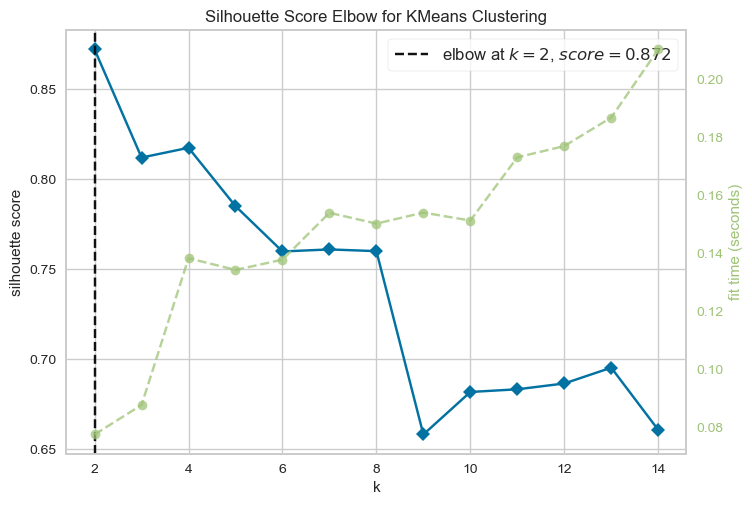

In [233]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=0)

visualizer = KElbowVisualizer(km, k=(2,15), metric = 'silhouette')

visualizer.fit(X)

visualizer.show()
plt.show()

In [238]:
km = KMeans(n_clusters = 4,random_state=0)

y_pred = km.fit_predict(X)


live['cluster']=y_pred

In [239]:
km.cluster_centers_

array([[1.72302832e+03, 2.26566449e+02, 7.82962963e+01, 1.67882135e+03,
        3.43507625e+01, 7.40740741e+00, 1.85620915e+00, 3.07189542e-01,
        2.85403050e-01],
       [6.78450000e+02, 8.48665000e+03, 6.15100000e+02, 5.29950000e+02,
        1.28500000e+02, 6.40000000e+00, 8.45000000e+00, 3.72500000e+00,
        1.42500000e+00],
       [1.10468300e+02, 7.92453755e+01, 2.00053755e+01, 1.01999684e+02,
        7.28205534e+00, 5.76442688e-01, 3.66482213e-01, 1.69802372e-01,
        7.08300395e-02],
       [4.67283186e+02, 2.81868584e+03, 4.20721239e+02, 3.50128319e+02,
        1.00756637e+02, 7.91150442e+00, 6.20353982e+00, 1.56637168e+00,
        7.16814159e-01]])

C:\Users\Brett Tully\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


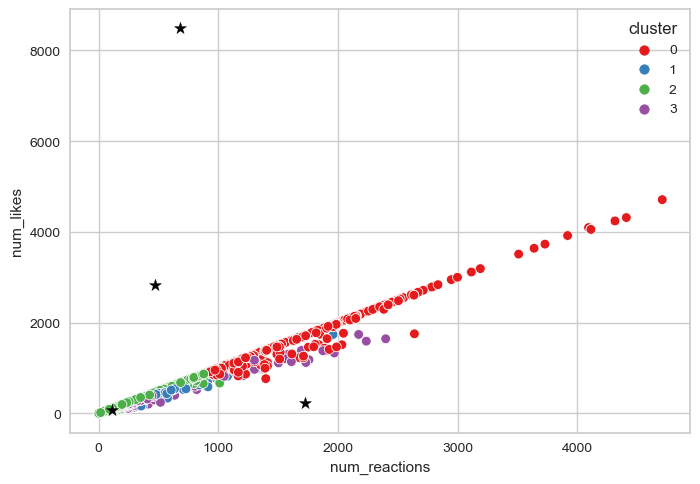

In [242]:
sns.scatterplot('num_reactions','num_likes',data=live, 
               hue=live['cluster'], 
               palette='Set1',legend='full')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
           marker='*',s=80,c='black')

In [241]:
from sklearn import metrics 

silhouette_avg = metrics.silhouette_score(y,y_pred)

print('The silhouette coefficient is:  ',silhouette_avg)

ValueError: Expected 2D array, got 1D array instead:
array=[3 1 3 ... 1 1 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
cluster = DBSCAN(eps=3,min_samples=4).fit(X)

In [ ]:
set(cluster.labels_)

In [ ]:
tt = sns.scatterplot('num_reactions','num_likes',data=X,
                    hue=cluster.labels_,palette='Set1',legend='full')